# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de **regresión** con el conjunto de datos *Boston House Prices Dataset*.

Estudiarán el dataset, harán visualizaciones, y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**Breve estudio del DataSet**

In [3]:
boston.data.shape # Matriz con los datos de entrada (atributos)

(506, 13)

In [4]:
len(boston.target) # Vector de valores a predecir

506

In [5]:
list(boston.feature_names) # Nombres de los atributos para cada columna de 'data'

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
print(boston.DESCR) # Descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en *80%* para entrenamiento, y *20%* para evaluación.

In [7]:
from sklearn.model_selection import train_test_split

X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina usted que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc.? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Respuestas**


1.  El conjunto de datos contiene información recopilada por el *Servicio de Censos* de *Estados Unidos*, con respecto a la vivienda en el área de *Boston Mass*.
    Los datos fueron publicados originalmente por *Harrison* y *Rubinfeld*, **«Hedonic prices and the demand for clean air»**, en el año **1978**.
    Cada entrada del conjunto de datos describe un suburbio o pueblo en Boston.


2.  La variable a predecir es `MEDV`.
    Representa el valor medio de las viviendas ocupadas por sus propietarios, en unidad de mil dólares


3.  En total, hay **13** variables disponibles para realizar la predicción.
    - `CRIM` Tasa de criminalidad per cápita por ciudad.
    - `ZN` Proporción de terreno residencial, dividido en zonas, para lotes de más de 25,000 pies cuadrados.
    - `INDUS` Proporción de acres comerciales no minoristas por ciudad.
    - `CHAS` Variable *dummy* de *Charles River*, indica limitación con el río.
    - `NOX` Concentración de óxidos nítricos (partes por 10 millones).
    - `RM` Número medio de habitaciones por vivienda.
    - `AGE` Proporción de propiedades ocupadas por sus propietarios, construidas antes de 1940.
    - `DIS` Distancias ponderadas a cinco centros de empleo de Boston.
    - `RAD` Índice de accesibilidad a carreteras radiales.
    - `TAX` Tasa de impuesto a la propiedad de valor total por diez mil dólares.
    - `PTRATIO` Proporción de alumno / maestro por ciudad.
    - `B` Proporción de personas negras por ciudad.
    - `LSTAT` Proporción de personas pobres por ciudad.


4. A simple vista, y sin haber estudiado la distribución de las variables, imaginamos que los atributos más determinantes serían `CRIM` (medida sobre la inseguridad), `DIS` (posibilidades de obtener un empleo), `TAX` (cantidad de impuestos), y `B` (en esa época, el racismo era corriente).


5. Es inmediato notar la inclusión de las variables `B` y `LSTAT`. Claramente estos atributos pueden ser causantes de dilemas éticos.

**Convertimos nuestro DataSet a un DataFrame**

In [8]:
# Initializing the dataframe
df = pd.DataFrame(boston.data)

# Adding the feature names to the dataframe
df.columns = boston.feature_names

# Adding target variable to dataframe
df['MEDV'] = boston.target 

# Check the shape of dataframe
df.shape

(506, 14)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. ¿Para usted, cuáles son esos atributos? Lístelos en orden de importancia.

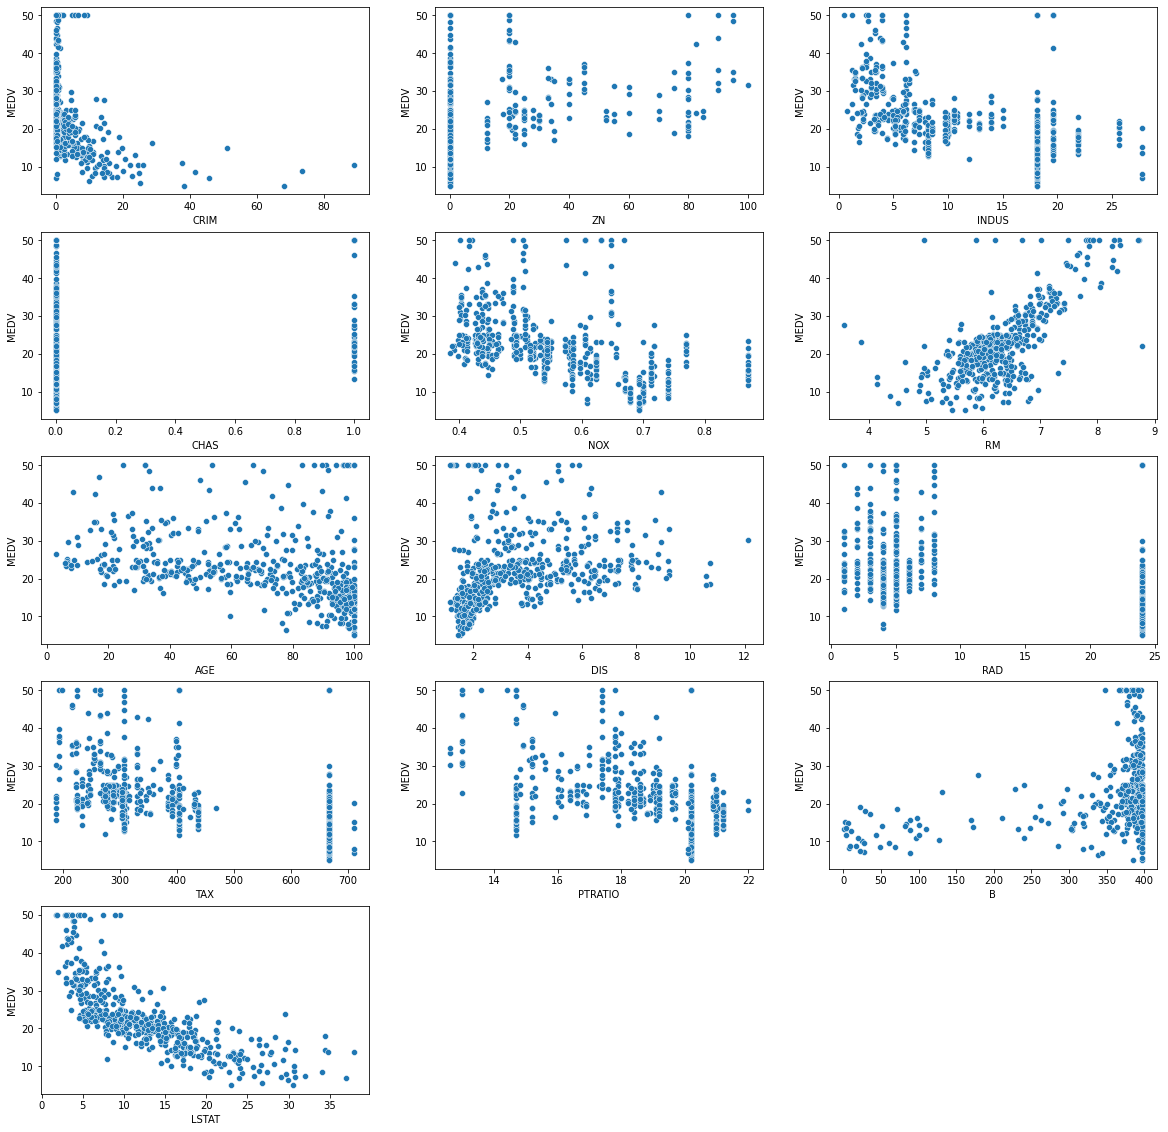

In [11]:
import math

features = boston.feature_names

# Creamos diseño general
n_cols = 3
n_rows = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in enumerate(features):
    # Calculamos filas y columnas
    row = math.floor(i / n_cols)
    col = i % n_cols
    # Configuramos visualización
    ax = axs[row, col]
    # Visualizamos la distribución de variables
    sb.scatterplot(data=df, x=feature, y='MEDV', ax=ax)

# Limpiamos gráficos vacíos
for col in range(n_cols):
    for row in range(n_rows):
        if not axs[row, col].has_data():
            axs[row, col].axis('off')

**Respuesta**

Estudiando las gráficas obtenidas, estimamos que los atributos más informativos para la predicción son `RM` y `LSTAT`, ya que parecen poseer una relación con la variable objetivo similar a una función.
En mucha menor medida, podríamos llegar a considerar a las variables `AGE` y `DIS` como otros posibles candidatos.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere pueda ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a *50*.

**Seleción de Atributo**

In [12]:
# Seleccionamos el atributo 'RM'
feature = 'RM'
selector = (boston['feature_names'] == feature)

X_train_feature = X_train[:, selector]
X_test_feature = X_test[:, selector]

X_train_feature.shape, X_test_feature.shape

((404, 1), (102, 1))

**Entrenamiento**

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Regresión Lineal
degree = 1

pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature

model = make_pipeline(pf, lr)

In [14]:
model.fit(X_train_feature, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [15]:
lr.coef_

array([-36.47618963,   9.37638431])

**Evaluación**

In [16]:
from sklearn.metrics import mean_squared_error

y_train_prediction = model.predict(X_train_feature)
y_test_prediction = model.predict(X_test_feature)

train_error = mean_squared_error(y_train, y_train_prediction)
test_error = mean_squared_error(y_test, y_test_prediction)

print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.5}')

Train error: 42.82
Test error: 46.907


**Visualización**

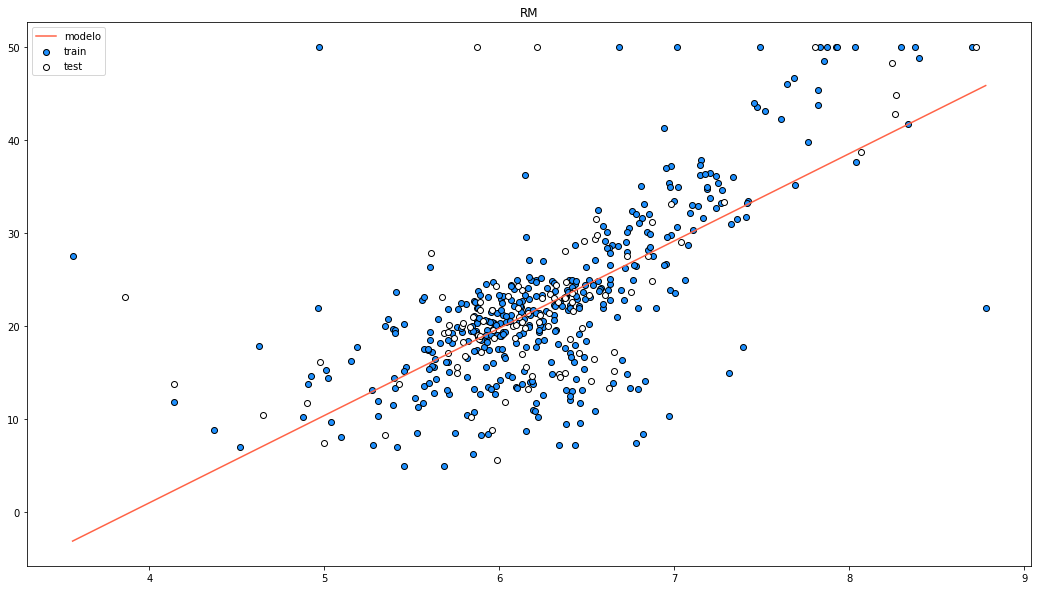

In [17]:
# Definimos límites del gráfico
x_start = min(np.min(X_train_feature), np.min(X_test_feature))
x_end = max(np.max(X_train_feature), np.max(X_test_feature))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

fig = plt.figure(figsize=(18, 10))

# Predicción de nuestro modelo
plt.plot(x, model.predict(x), color='tomato', label='modelo')
# Datos de entrenamiento y test
plt.scatter(X_train_feature, y_train, facecolor='dodgerblue', edgecolor='k', label='train')
plt.scatter(X_test_feature, y_test, facecolor='white', edgecolor='k', label='test')

plt.title(feature)
plt.legend()
plt.show()

**Respuesta**

Seleccionamos el atributo `RM` para la predicción de precios.

Siendo generosos, se obtuvo un modelo bastante preciso si consideramos lo simple que resulta su estructura (regresor **lineal** con solo **2** parámetros a entrenar).

Una observación importante a notar, es que nuestro modelo no es tan inteligente para predecir precios cuando los valores de `RM` son muy bajos (y no aparecen en el conjunto de entrenamiento).
En estas situaciones, el modelo predice valores **negativos** para las propiedades.

In [18]:
model.predict(np.array([1, 2, 3, 4]).reshape(-1, 1))

array([-27.09980531, -17.723421  ,  -8.34703669,   1.02934763])

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar el **mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a *40*, e incluso a *35*.

**Selección de Hiperparámetro (Grado)**

In [19]:
train_errors = []
test_errors = []
degrees = range(10)

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_feature, y_train)

    # predict:
    y_train_pred = model.predict(X_train_feature)
    y_test_pred = model.predict(X_test_feature)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Degree 0 | Train Error 85.144 | Test Error 81.582
Degree 1 | Train Error 42.820 | Test Error 46.907
Degree 2 | Train Error 37.746 | Test Error 39.795
Degree 3 | Train Error 36.396 | Test Error 39.826
Degree 4 | Train Error 34.808 | Test Error 41.554
Degree 5 | Train Error 33.131 | Test Error 41.038
Degree 6 | Train Error 33.130 | Test Error 41.009
Degree 7 | Train Error 33.060 | Test Error 42.394
Degree 8 | Train Error 33.060 | Test Error 42.399
Degree 9 | Train Error 32.855 | Test Error 46.060


**Análisis de Errores**

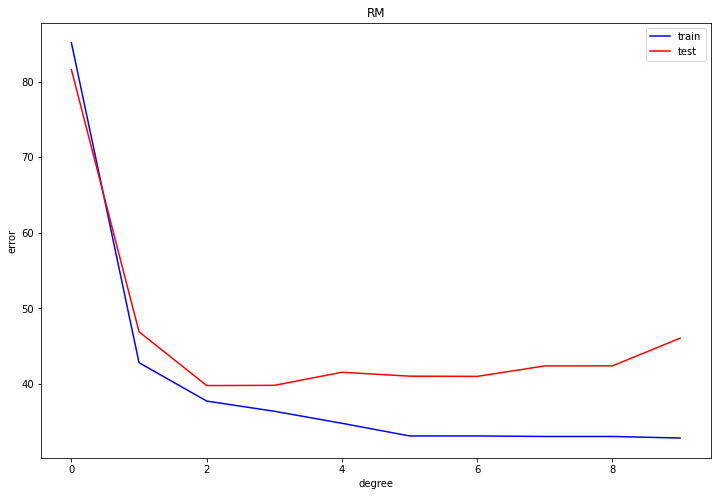

In [20]:
fig = plt.figure(figsize=(12, 8))

plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')

plt.title(feature)
plt.legend()
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

Observando la curva, interpretamos que se comienza a sobreajustar (levemente) a partir del grado *3*.

**Selección de Modelo**

In [21]:
degree = 2

pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature

model = make_pipeline(pf, lr)

model.fit(X_train_feature, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

**Visualización**

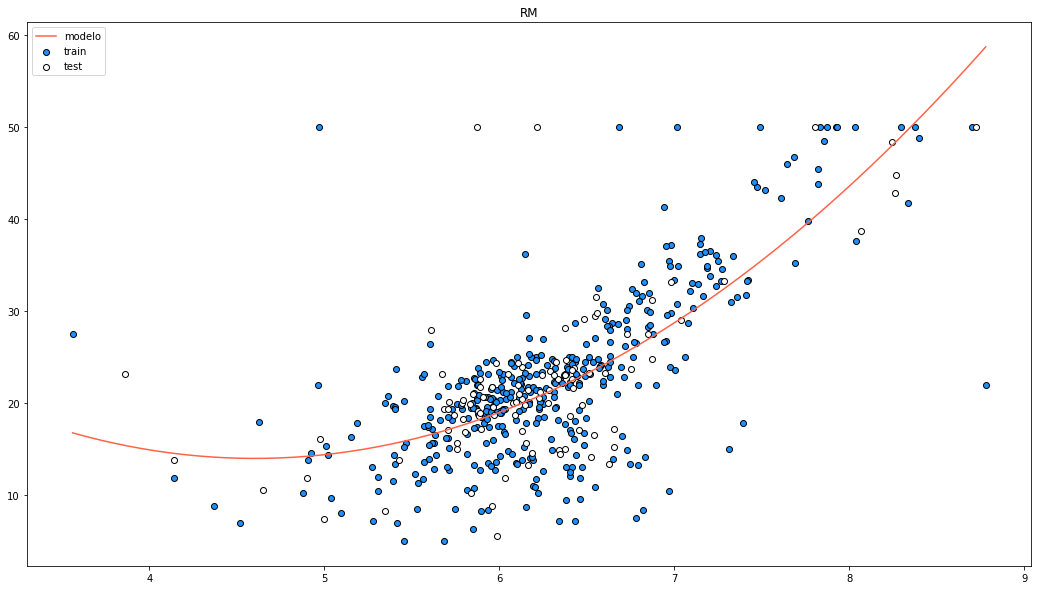

In [22]:
# Definimos límites del gráfico
x_start = min(np.min(X_train_feature), np.min(X_test_feature))
x_end = max(np.max(X_train_feature), np.max(X_test_feature))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

fig = plt.figure(figsize=(18, 10))

# Predicción de nuestro modelo
plt.plot(x, model.predict(x), color='tomato', label='modelo')
# Datos de entrenamiento y test
plt.scatter(X_train_feature, y_train, facecolor='dodgerblue', edgecolor='k', label='train')
plt.scatter(X_test_feature, y_test, facecolor='white', edgecolor='k', label='test')

plt.title(feature)
plt.legend()
plt.show()

**Respuesta**

Se podría asumir que existe cierto grado de correlación entre los features `RM` y `MEDV`, ya que los datos son bastante lineales.
Por lo tanto, con un polinomio de grado *1* o *2* somos capaces de obtener un buen modelo.

Al contrario, al aumentar el grado de nuestro modelo, se comienza a producir sobreajuste.
Lo cual se observa al analizar los resultados obtenidos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio *2*.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**Selección de Atributos**

In [23]:
# Seleccionamos los atributos 'RM' y 'LSTAT'
feature1 = 'RM'
feature2 = 'LSTAT'
selector = (boston['feature_names'] == feature1) | (boston['feature_names'] == feature2)

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]

X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

**Selección de Hiperparámetro (Grado)**

In [24]:
train_errors = []
test_errors = []
degrees = range(1, 10)

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)

    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Degree 1 | Train Error 28.790 | Test Error 37.383
Degree 2 | Train Error 18.659 | Test Error 28.145
Degree 3 | Train Error 17.078 | Test Error 28.567
Degree 4 | Train Error 14.189 | Test Error 33.999
Degree 5 | Train Error 12.906 | Test Error 34.201
Degree 6 | Train Error 12.352 | Test Error 34.925
Degree 7 | Train Error 12.207 | Test Error 70.335
Degree 8 | Train Error 11.946 | Test Error 554.626
Degree 9 | Train Error 12.198 | Test Error 1109.154


**Análisis de Errores**

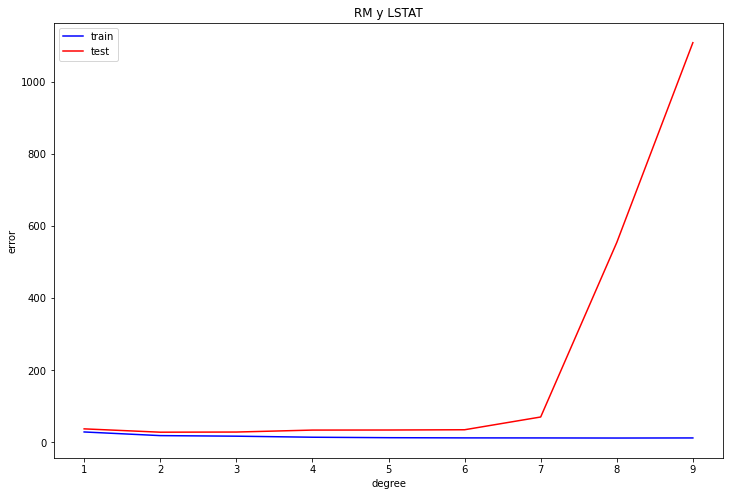

In [25]:
fig = plt.figure(figsize=(12, 8))

plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')

plt.title(feature1 + ' y ' + feature2)
plt.legend()
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

**Respuesta**

Es posible ver que el modelo empieza a sobreajustar desde el grado *3*.
Nuevamente con el grado *2* se obtuvo el modelo que, aparentemente, mejor generaliza.

Realizando una comparación con el ejercicio anterior, se observa que el error del conjunto de test disminuyó considerablemente (de 39.795 a 28.145, para los modelos de grado *2*).

Se encontró un mejor modelo debido, en su mayor parte, a que utilizamos más información para predecir la variable objetivo.
La variable `MEDV` no depende de un único atributo (`RM`), por lo que agregar información relevante (`LSTAT`) permite que nuestro modelo cuente con más datos a la hora de predecir precios de propiedades.

## Más ejercicios (opcionales)

### Ejercicio 6: Regularización

Entrene y evalúe regresiones con regularización `Ridge`.
Deberá probar distintos valores de *alpha* (fuerza de la regularización).
¿Mejoran los resultados?

**Selección de Hiperparámetro (Alpha)**

In [26]:
from sklearn.linear_model import Ridge

train_errors = []
test_errors = []
degree = 9
alphas = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2]

for alpha in alphas:
    # train:
    pf = PolynomialFeatures(degree, include_bias=False)
    rd = Ridge(alpha=alpha, normalize=True) # Normalizamos para evitar 'ill-conditioned matrix'.
    model = make_pipeline(pf, rd)
    model.fit(X_train_fs, y_train)

    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Alpha {alpha:6.4f} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Alpha 0.0001 | Train Error 14.314 | Test Error 30.122
Alpha 0.0010 | Train Error 15.693 | Test Error 29.572
Alpha 0.0100 | Train Error 17.251 | Test Error 28.729
Alpha 0.1000 | Train Error 18.629 | Test Error 28.529
Alpha 0.2500 | Train Error 19.026 | Test Error 28.213
Alpha 0.5000 | Train Error 19.493 | Test Error 27.942
Alpha 0.7500 | Train Error 19.925 | Test Error 27.842
Alpha 1.0000 | Train Error 20.345 | Test Error 27.833
Alpha 1.5000 | Train Error 21.175 | Test Error 27.980
Alpha 2.0000 | Train Error 22.002 | Test Error 28.274


**Análisis de Errores**

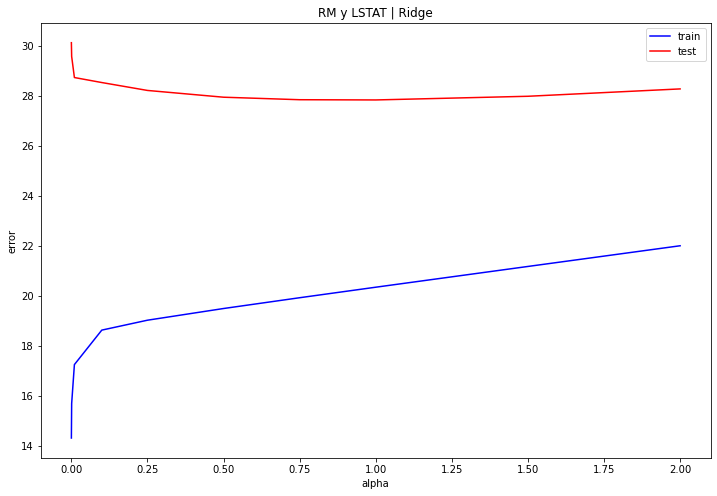

In [27]:
fig = plt.figure(figsize=(12, 8))

plt.plot(alphas, train_errors, color='blue', label='train')
plt.plot(alphas, test_errors, color='red', label='test')

plt.title(feature1 + ' y ' + feature2 + ' | ' + 'Ridge')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

**Respuesta**

Fijando el grado del modelo a *9* (con el que se observó el mayor sobreajuste), obtuvimos los resultados anteriores.

Con una regularización de *1*, se obtuvo el mejor modelo con un error de test de 27.833 (en comparación al error de test sin regularización que fue de 1109.154).
Es importante mencionar que quizás estos resultados no sean totalmente comparables, ya que fue necesario normalizar nuestros datos de entrenamiento para evitar *ill-conditioned matrix*.

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (**Atención:** va a andar mucho más lento).
Estudie los resultados.

**Selección de Atributos**

In [28]:
# Seleccionamos todos los atributos
X_train_all = X_train
X_test_all = X_test

X_train_all.shape, X_test_all.shape

((404, 13), (102, 13))

**Selección de Hiperparámetro (Grado)**

In [29]:
train_errors = []
test_errors = []
degrees = range(1, 7)

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_all, y_train)

    # predict:
    y_train_pred = model.predict(X_train_all)
    y_test_pred = model.predict(X_test_all)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:10.3f} | Test Error {test_error:10.3f}')

Degree 1 | Train Error     19.326 | Test Error     33.449
Degree 2 | Train Error      4.340 | Test Error     31.278
Degree 3 | Train Error      0.000 | Test Error 976575.955
Degree 4 | Train Error      0.000 | Test Error 950756.907
Degree 5 | Train Error      0.000 | Test Error 195453.639
Degree 6 | Train Error      0.000 | Test Error 200691.242


**Respuesta**

El modelo empieza a sobreajustar a partir del grado *3* (al mismo tiempo que aprende a la perfección los datos de entrenamiento).

Una vez más, con el grado *2* se consigue el modelo que mejor generaliza (con un error en el conjunto de test de 31.278).

Aparentemente, al utilizar todos los atributos, obtenemos un rendimiento peor a cuando solo utilizábamos los features que considerábamos más relevantes para la predicción (donde se consiguió un error de 28.145).
Es posible que la causa de esta particularidad sea que existen ciertos atributos en el conjunto de datos que no aportan información, e incluso entorpecen el aprendizaje al no estar relacionados con la variable a predecir.
Un ejemplo podría ser la variable `CHAS`.